In [3]:
from pydrake.trajectories import BezierCurve, BsplineTrajectory
from pydrake.math import BsplineBasis, KnotVectorType
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def plot_joint_trajectory(joint_data, times, joint_names=None, title="Robot Joint Trajectory"):
    """
    Plot robot joint trajectories over time
    
    Parameters:
    joint_data: numpy array of shape (k, N) - k joints, N trajectory points
    dt: time step between trajectory points (default: 0.01s)
    joint_names: list of k joint names (optional)
    title: plot title (optional)
    """
    
    joint_data = np.array(joint_data)
    k, N = joint_data.shape
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot each joint trajebctory
    colors = plt.cm.tab10(np.linspace(0, 1, k))
    
    for i in range(k):
        if joint_names:
            label = joint_names[i]
        else:
            label = f'Joint {i+1}'
        
        ax.plot(times, joint_data[i], color=colors[i], linewidth=2, 
                label=label, marker='o', markersize=2, alpha=0.8)
    
    # Customize the plot
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Joint Angle (rad)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    return fig, ax

def plot_joint_trajectory_subplots(joint_data, times, joint_names=None, title="Robot Joint Trajectories"):
    """
    Plot robot joint trajectories in separate subplots (alternative visualization)
    
    Parameters:
    joint_data: numpy array of shape (k, N) - k joints, N trajectory points
    dt: time step between trajectory points (default: 0.01s)
    joint_names: list of k joint names (optional)
    title: plot title (optional)
    """
    
    joint_data = np.array(joint_data)
    k, N = joint_data.shape
    
    # Create subplots
    fig, axes = plt.subplots(k, 1, figsize=(10, 2*k), sharex=True)
    if k == 1:
        axes = [axes]
    
    fig.suptitle(title, fontsize=14)
    
    # Plot each joint in its own subplot
    for i in range(k):
        if joint_names:
            joint_name = joint_names[i]
        else:
            joint_name = f'Joint {i+1}'
            
        axes[i].plot(times, joint_data[i]) # , 'b-', linewidth=2, marker='o', markersize=2)
        axes[i].set_ylabel(f'{joint_name}\n(rad)')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlim(times[0], times[-1])
    
    axes[-1].set_xlabel('Time (s)')
    plt.tight_layout()
    return fig, axes

In [63]:
control_points = np.array([[ 0, 0,  0, 0],
                           [-1, 2,  0, 2],
                           [ 3, -4, -2, 0]]).T

In [64]:
bezier_curve = BezierCurve(0, 1, control_points)

In [65]:
ts = np.linspace(0, 1, 100)
values = np.hstack([bezier_curve.value(t) for t in ts])

(<Figure size 1000x800 with 4 Axes>,
 array([<Axes: ylabel='Joint 1\n(rad)'>, <Axes: ylabel='Joint 2\n(rad)'>,
        <Axes: ylabel='Joint 3\n(rad)'>,
        <Axes: xlabel='Time (s)', ylabel='Joint 4\n(rad)'>], dtype=object))

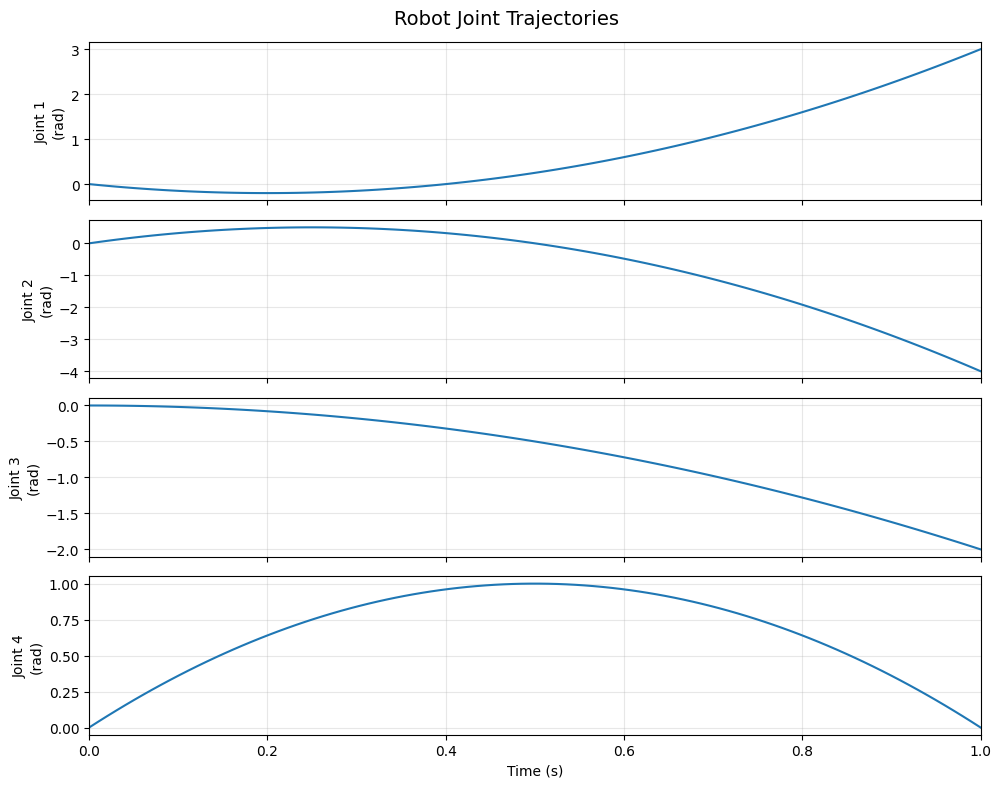

In [66]:
plot_joint_trajectory_subplots(values, ts)

In [67]:
control_points = np.array([[ 0,  0,  0, 0],
                           [-1,  2,  0, 2],
                           [ 3, -4, -2, 0],
                           [ 4, -4, -1, 0]]).T

In [68]:
bspline_basis =  BsplineBasis(2, [0, 1, 2, 3])

In [69]:
bspline_basis.final_parameter_value()

2.0

In [70]:
bspline_basis.EvaluateLinearInControlPoints(1.5)

array([0.5, 0.5])

In [71]:
bspline_basis.knots()

[0.0, 1.0, 2.0, 3.0]

In [72]:
bspline_basis.num_basis_functions()

2

In [80]:
bspline_basis.knots()`

[0.08333333333333334,
 0.25,
 0.41666666666666663,
 0.5833333333333333,
 0.75,
 0.9166666666666666]

(<Figure size 1000x800 with 4 Axes>,
 array([<Axes: ylabel='Joint 1\n(rad)'>, <Axes: ylabel='Joint 2\n(rad)'>,
        <Axes: ylabel='Joint 3\n(rad)'>,
        <Axes: xlabel='Time (s)', ylabel='Joint 4\n(rad)'>], dtype=object))

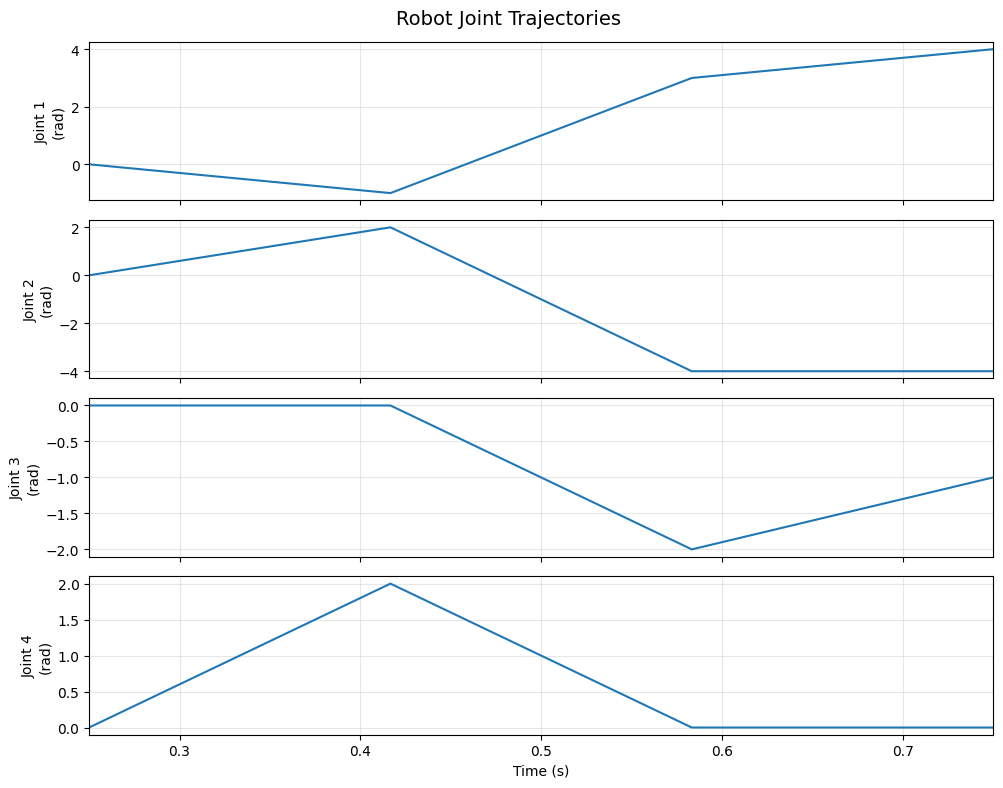

In [86]:
bspline_basis = BsplineBasis(order=2, 
                             num_basis_functions=4, 
                             type=KnotVectorType.kUniform, 
                             initial_parameter_value=0.25, 
                             final_parameter_value=0.75)
bspline = BsplineTrajectory(bspline_basis, control_points)
ts = np.linspace(bspline.start_time(), bspline.end_time(), 100)
values = np.hstack([bspline.value(t) for t in ts])
plot_joint_trajectory_subplots(values, ts)

(<Figure size 1000x800 with 4 Axes>,
 array([<Axes: ylabel='Joint 1\n(rad)'>, <Axes: ylabel='Joint 2\n(rad)'>,
        <Axes: ylabel='Joint 3\n(rad)'>,
        <Axes: xlabel='Time (s)', ylabel='Joint 4\n(rad)'>], dtype=object))

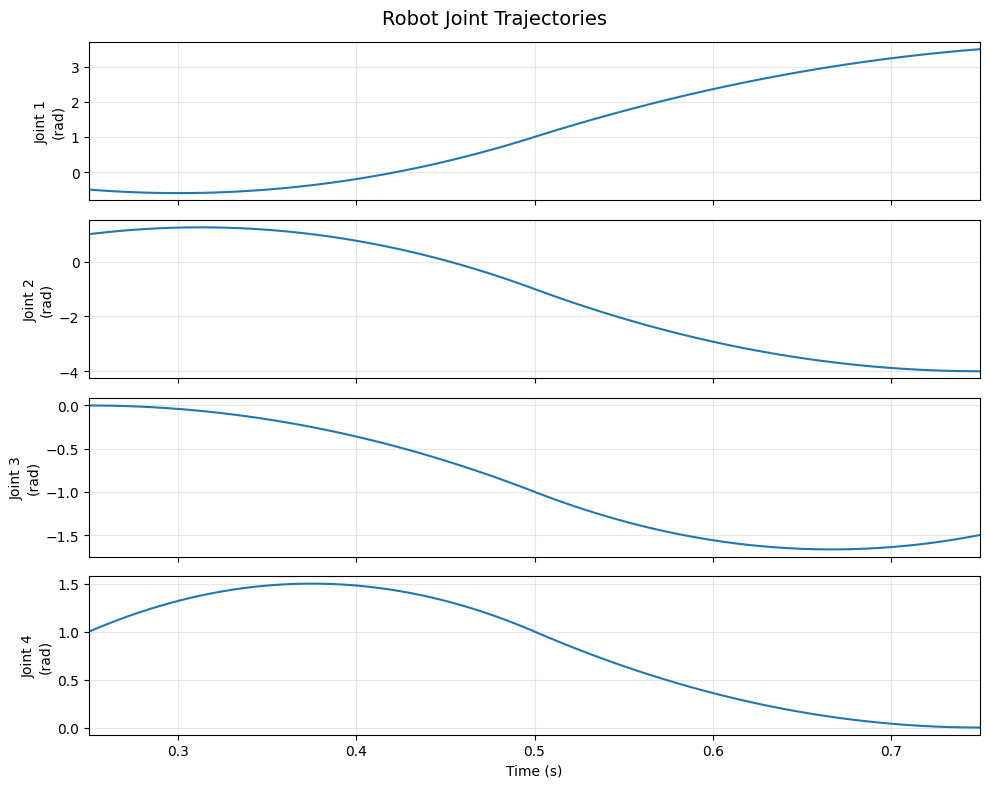

In [96]:
bspline_basis = BsplineBasis(order=3, 
                             num_basis_functions=4, # len(knots()) - order == control_points
                             type=KnotVectorType.kUniform, 
                             initial_parameter_value=0.25, 
                             final_parameter_value=0.75)
bspline = BsplineTrajectory(bspline_basis, control_points)
ts = np.linspace(bspline.start_time(), bspline.end_time(), 100)
values = np.hstack([bspline.value(t) for t in ts])
plot_joint_trajectory_subplots(values, ts)

(<Figure size 1000x800 with 4 Axes>,
 array([<Axes: ylabel='Joint 1\n(rad)'>, <Axes: ylabel='Joint 2\n(rad)'>,
        <Axes: ylabel='Joint 3\n(rad)'>,
        <Axes: xlabel='Time (s)', ylabel='Joint 4\n(rad)'>], dtype=object))

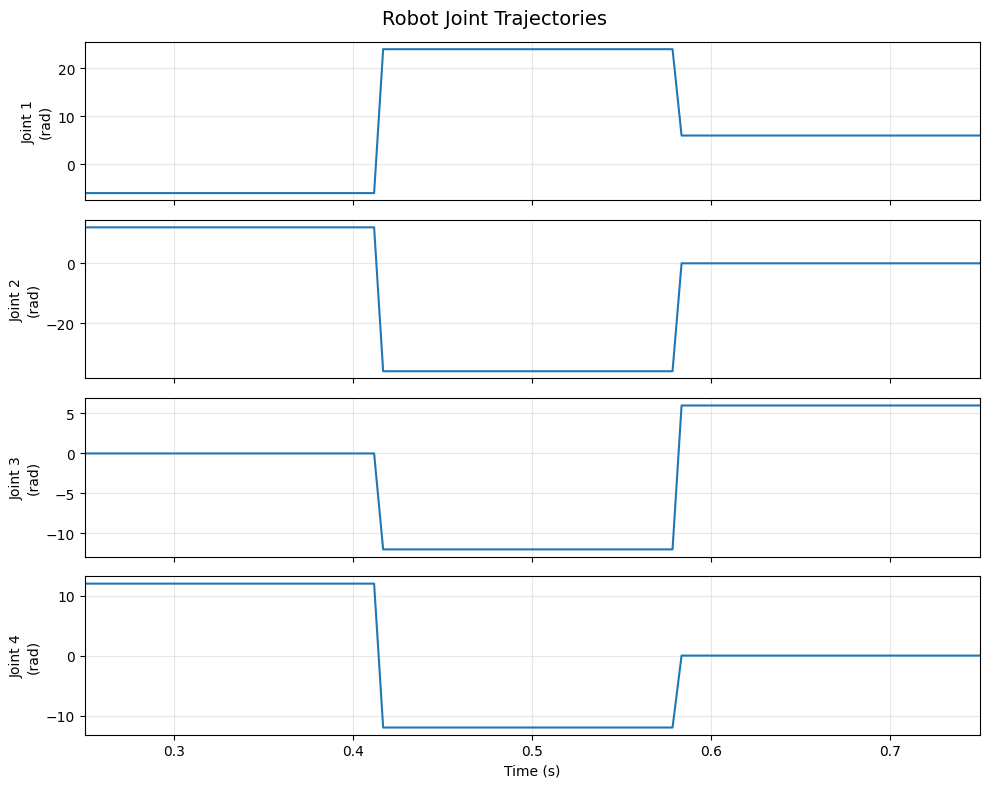

In [85]:
values = np.hstack([bspline.EvalDerivative(t, 1) for t in ts])
plot_joint_trajectory_subplots(values, ts)

In [99]:
# https://drake.mit.edu/doxygen_cxx/classdrake_1_1trajectories_1_1_exponential_plus_piecewise_polynomial.html
from pydrake.trajectories import PiecewisePolynomial, ExponentialPlusPiecewisePolynomial
K = np.array([1.23])
A = np.array([3.45])
alpha = np.array([6.78])
breaks = np.array([0.0, 0.5])
samples = np.array([[1.0, 2.0]])
trajectory = ExponentialPlusPiecewisePolynomial(K, A, alpha, PiecewisePolynomial.FirstOrderHold(breaks, samples))

(<Figure size 1000x200 with 1 Axes>,
 [<Axes: xlabel='Time (s)', ylabel='Joint 1\n(rad)'>])

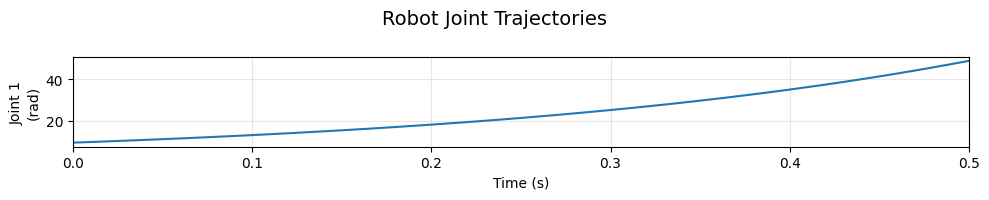

In [101]:
ts = np.linspace(trajectory.start_time(), trajectory.end_time(), 100)
values = np.hstack([trajectory.value(t) for t in ts])
plot_joint_trajectory_subplots(values, ts)

(<Figure size 1000x200 with 1 Axes>,
 [<Axes: xlabel='Time (s)', ylabel='Joint 1\n(rad)'>])

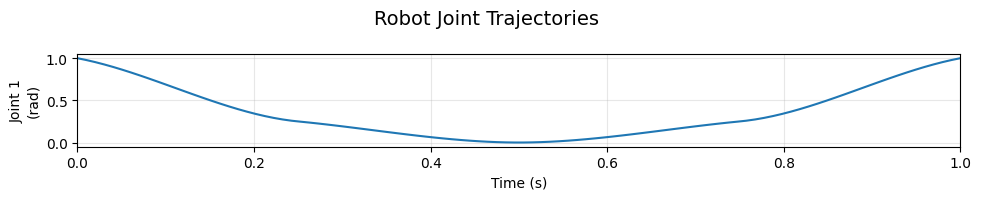

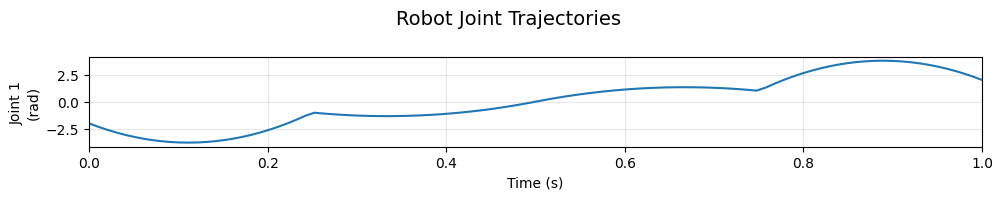

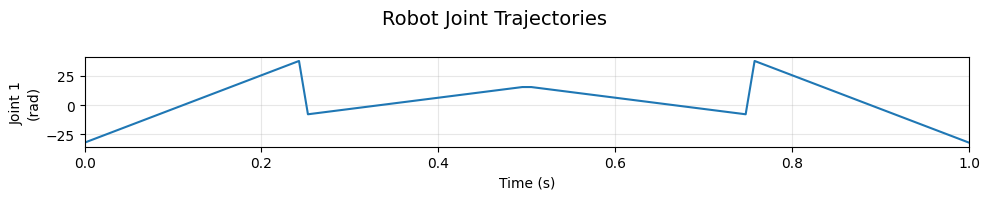

In [126]:
N = 5
x = np.atleast_2d(np.linspace(-1, 1, N))
y = x ** 2
dy = 2 * x
breaks = np.linspace(0, 1, N)
trajectory = PiecewisePolynomial.CubicHermite(breaks, y, dy)
ts = np.linspace(trajectory.start_time(), trajectory.end_time(), 100)
values = np.hstack([trajectory.value(t) for t in ts])
plot_joint_trajectory_subplots(values, ts)
values = np.hstack([trajectory.EvalDerivative(t, 1) for t in ts])
plot_joint_trajectory_subplots(values, ts)
values = np.hstack([trajectory.EvalDerivative(t, 2) for t in ts])
plot_joint_trajectory_subplots(values, ts)

(<Figure size 1000x200 with 1 Axes>,
 [<Axes: xlabel='Time (s)', ylabel='Joint 1\n(rad)'>])

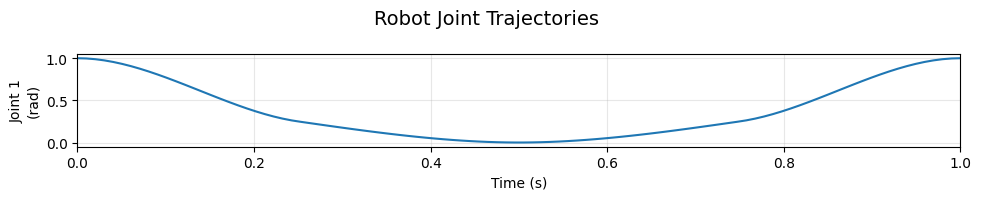

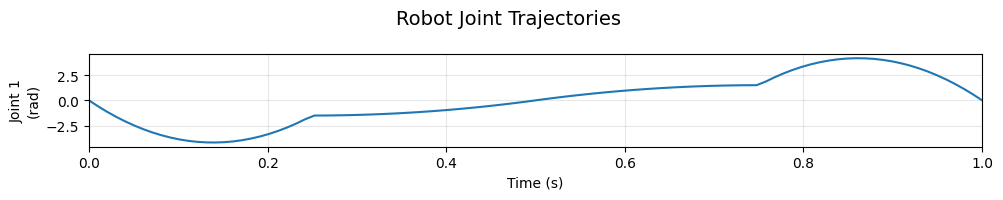

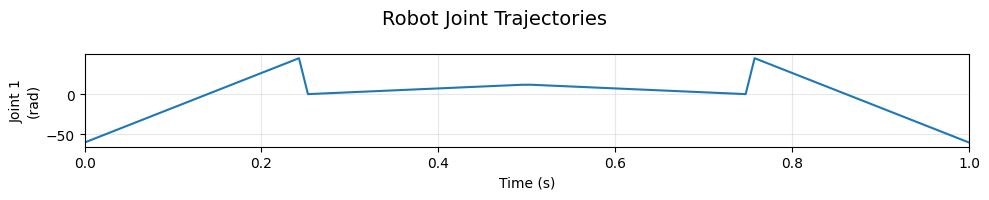

In [125]:
trajectory = PiecewisePolynomial.CubicShapePreserving(breaks, y, True)
ts = np.linspace(trajectory.start_time(), trajectory.end_time(), 100)
values = np.hstack([trajectory.value(t) for t in ts])
plot_joint_trajectory_subplots(values, ts)
values = np.hstack([trajectory.EvalDerivative(t, 1) for t in ts])
plot_joint_trajectory_subplots(values, ts)
values = np.hstack([trajectory.EvalDerivative(t, 2) for t in ts])
plot_joint_trajectory_subplots(values, ts)

(<Figure size 1000x200 with 1 Axes>,
 [<Axes: xlabel='Time (s)', ylabel='Joint 1\n(rad)'>])

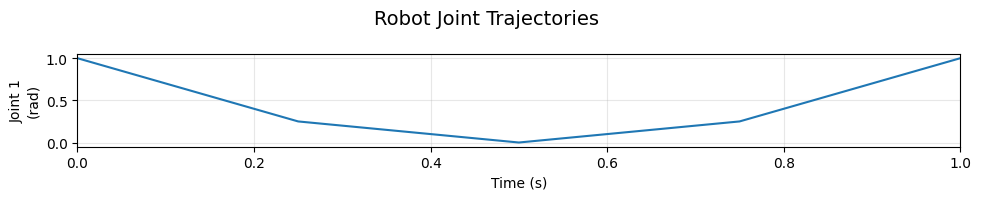

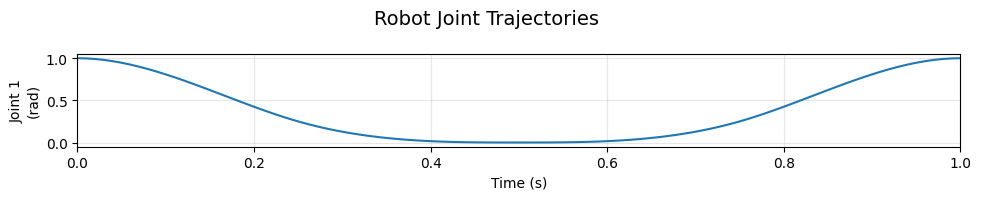

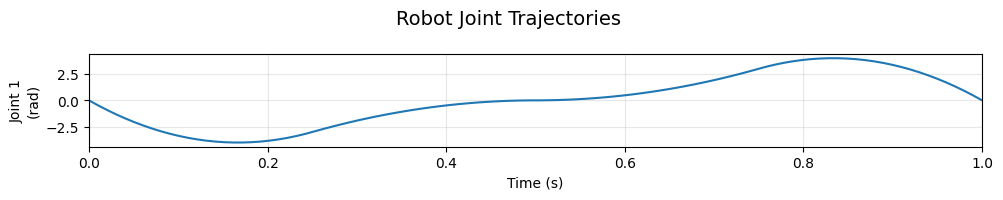

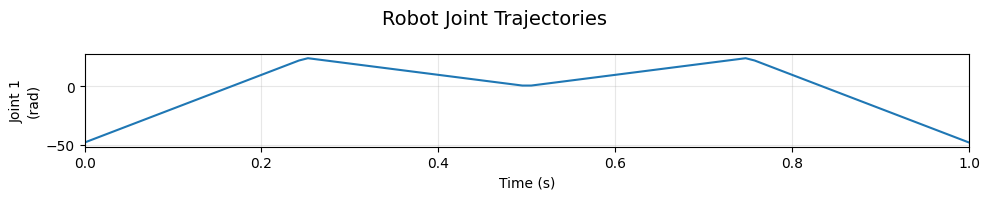

In [131]:
trajectory = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(breaks, y, True)
ts = np.linspace(trajectory.start_time(), trajectory.end_time(), 100)
plot_joint_trajectory_subplots(y, breaks)
values = np.hstack([trajectory.value(t) for t in ts])
plot_joint_trajectory_subplots(values, ts)
values = np.hstack([trajectory.EvalDerivative(t, 1) for t in ts])
plot_joint_trajectory_subplots(values, ts)
values = np.hstack([trajectory.EvalDerivative(t, 2) for t in ts])
plot_joint_trajectory_subplots(values, ts)